<h2>Keşifçi Veri Analizi ( EDA )</h2>

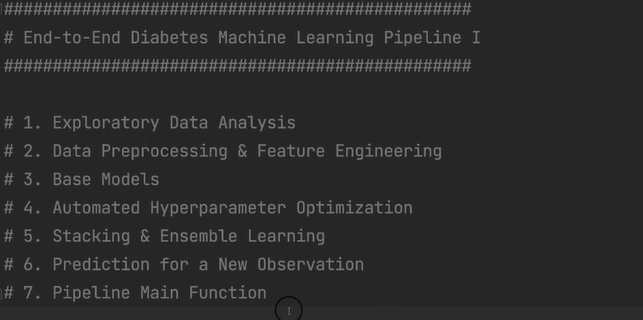

In [70]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier  # If you want to use CatBoost



# ... rest of your code ...

In [3]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head ######################")
    print(dataframe.head(head))
    print("##################### Tail ######################")
    print(dataframe.tail(head))
    print("##################### NA ########################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #################")
    
    # Sadece numerik sütunlar üzerinde çalış
    numeric_cols = dataframe.select_dtypes(include=['number'])
    print(numeric_cols.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)



In [4]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


In [5]:
def num_summary(dataframe, numerical_col, plot=False):
  """
  Veri çerçevesindeki sayısal bir sütunun istatistiksel özetini alır ve isteğe bağlı olarak histogram çizer.

  Args:
    dataframe: Pandas veri çerçevesi
    numerical_col: İncelenecek sayısal sütunun adı
    plot: Histogram çizilip çizilmeyeceğini belirten boolean değer (varsayılan: False)
  """

  quantiles = [0.05, 0.10, 0.25, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T)

  if plot:
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.title(numerical_col)
    plt.show(block=True)

In [6]:
def target_summary_with_num(dataframe, target, numerical_col):
  """
  Hedef değişkene göre sayısal bir değişkenin ortalamasını hesaplar.

  Args:
    dataframe: Pandas veri çerçevesi
    target: Hedef değişkenin adı
    numerical_col: Sayısal değişkenin adı
  """
  print(dataframe.groupby(target)[numerical_col].mean(), end="\n\n\n")

def target_summary_with_cat(dataframe, target, categorical_col):
  """
  Kategorik bir değişkene göre hedef değişkenin ortalamasını hesaplar.

  Args:
    dataframe: Pandas veri çerçevesi
    target: Hedef değişkenin adı
    categorical_col: Kategorik değişkenin adı
  """
  print(pd.DataFrame({"TARGET MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [7]:


def correlation_matrix(df, cols):
  """
  Verilen veri çerçevesindeki belirtilen sütunlar arasındaki korelasyonları görselleştirir.

  Args:
    df: Pandas veri çerçevesi
    cols: Korelasyonu hesaplanacak sütunların listesi
  """
  fig = plt.gcf()
  fig.set_size_inches(18, 8)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
  plt.show(block=True)

In [8]:

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car



In [9]:
df = pd.read_csv("../datasets/diabetes.csv")
check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head ######################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.62

In [10]:
cat_cols , num_cols , cat_but_car = grab_col_names(df,cat_th = 5, car_th=20)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [11]:
cat_cols

['Outcome']

In [12]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [13]:
for col in cat_cols:
    cat_summary(df,col)

         Outcome      Ratio
Outcome                    
0            500  65.104167
1            268  34.895833
##########################################


count    768.000000
mean       3.845052
std        3.369578
min        0.000000
5%         0.000000
10%        0.000000
25%        1.000000
30%        1.000000
40%        2.000000
50%        3.000000
60%        4.000000
70%        5.000000
80%        7.000000
90%        9.000000
95%       10.000000
99%       13.000000
max       17.000000
Name: Pregnancies, dtype: float64


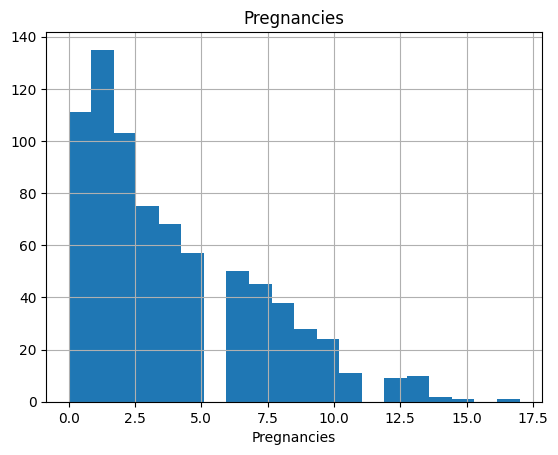

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
5%        79.000000
10%       85.000000
25%       99.000000
30%      102.000000
40%      109.000000
50%      117.000000
60%      125.000000
70%      134.000000
80%      147.000000
90%      167.000000
95%      181.000000
99%      196.000000
max      199.000000
Name: Glucose, dtype: float64


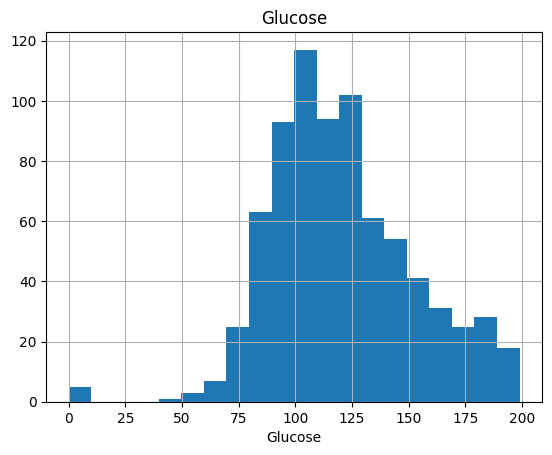

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
5%        38.700000
10%       54.000000
25%       62.000000
30%       64.000000
40%       68.000000
50%       72.000000
60%       74.000000
70%       78.000000
80%       82.000000
90%       88.000000
95%       90.000000
99%      106.000000
max      122.000000
Name: BloodPressure, dtype: float64


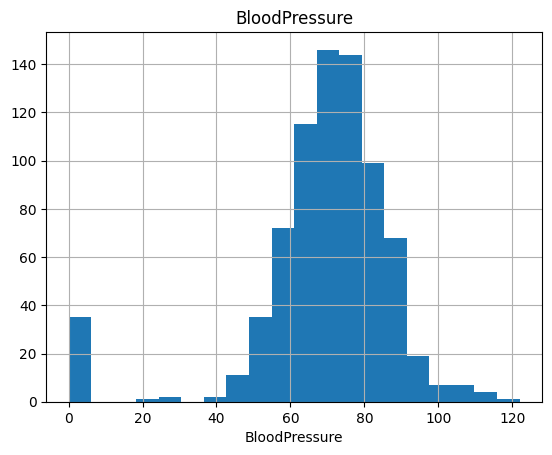

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
5%         0.000000
10%        0.000000
25%        0.000000
30%        8.200000
40%       18.000000
50%       23.000000
60%       27.000000
70%       31.000000
80%       35.000000
90%       40.000000
95%       44.000000
99%       51.330000
max       99.000000
Name: SkinThickness, dtype: float64


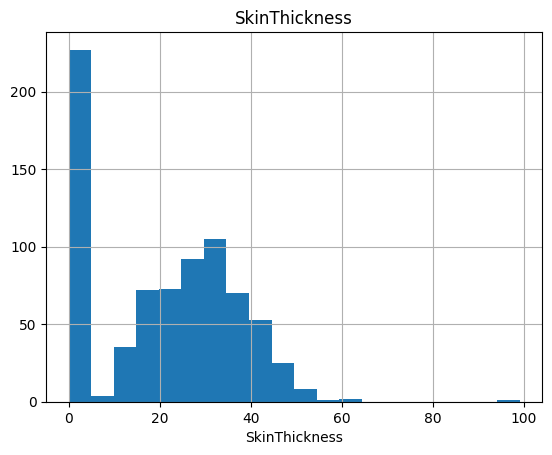

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
5%         0.000000
10%        0.000000
25%        0.000000
30%        0.000000
40%        0.000000
50%       30.500000
60%       72.200000
70%      106.000000
80%      150.000000
90%      210.000000
95%      293.000000
99%      519.900000
max      846.000000
Name: Insulin, dtype: float64


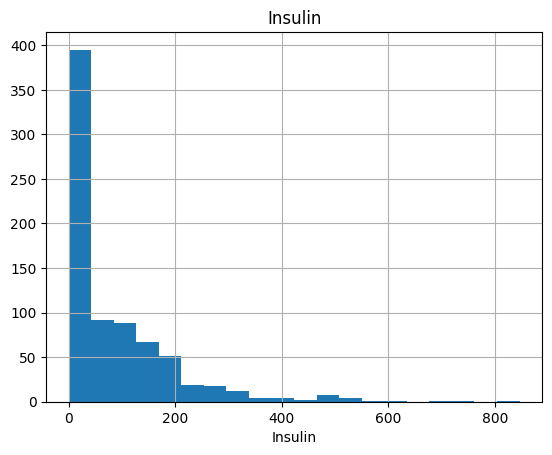

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
5%        21.800000
10%       23.600000
25%       27.300000
30%       28.200000
40%       30.100000
50%       32.000000
60%       33.700000
70%       35.490000
80%       37.800000
90%       41.500000
95%       44.395000
99%       50.759000
max       67.100000
Name: BMI, dtype: float64


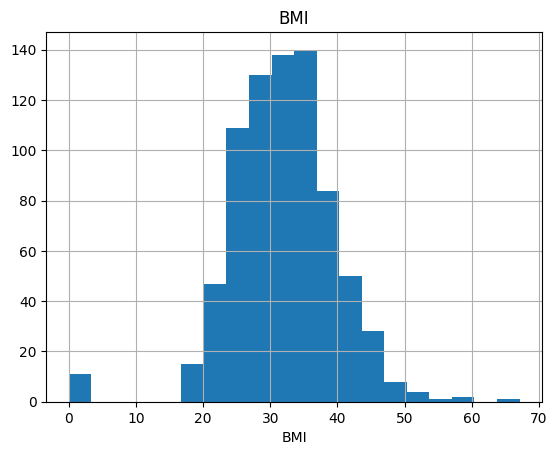

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
5%         0.140350
10%        0.165000
25%        0.243750
30%        0.259000
40%        0.302800
50%        0.372500
60%        0.454200
70%        0.563700
80%        0.687000
90%        0.878600
95%        1.132850
99%        1.698330
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64


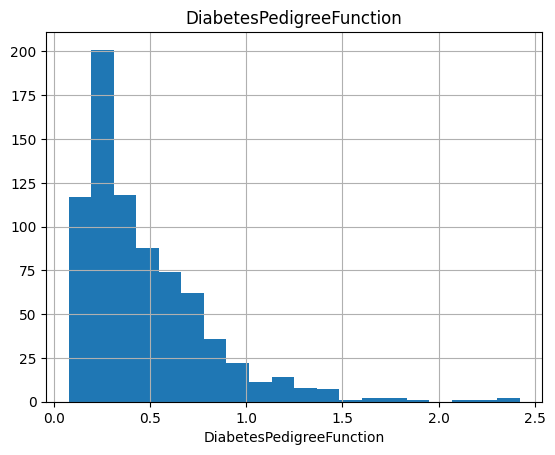

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
5%        21.000000
10%       22.000000
25%       24.000000
30%       25.000000
40%       27.000000
50%       29.000000
60%       33.000000
70%       38.000000
80%       42.600000
90%       51.000000
95%       58.000000
99%       67.000000
max       81.000000
Name: Age, dtype: float64


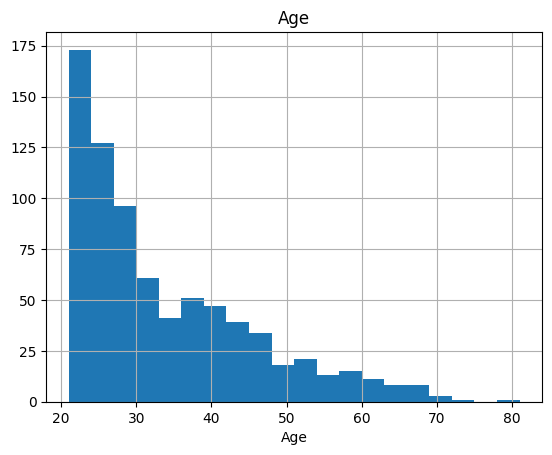

In [14]:
for col in num_cols:
    num_summary(df,col,True)

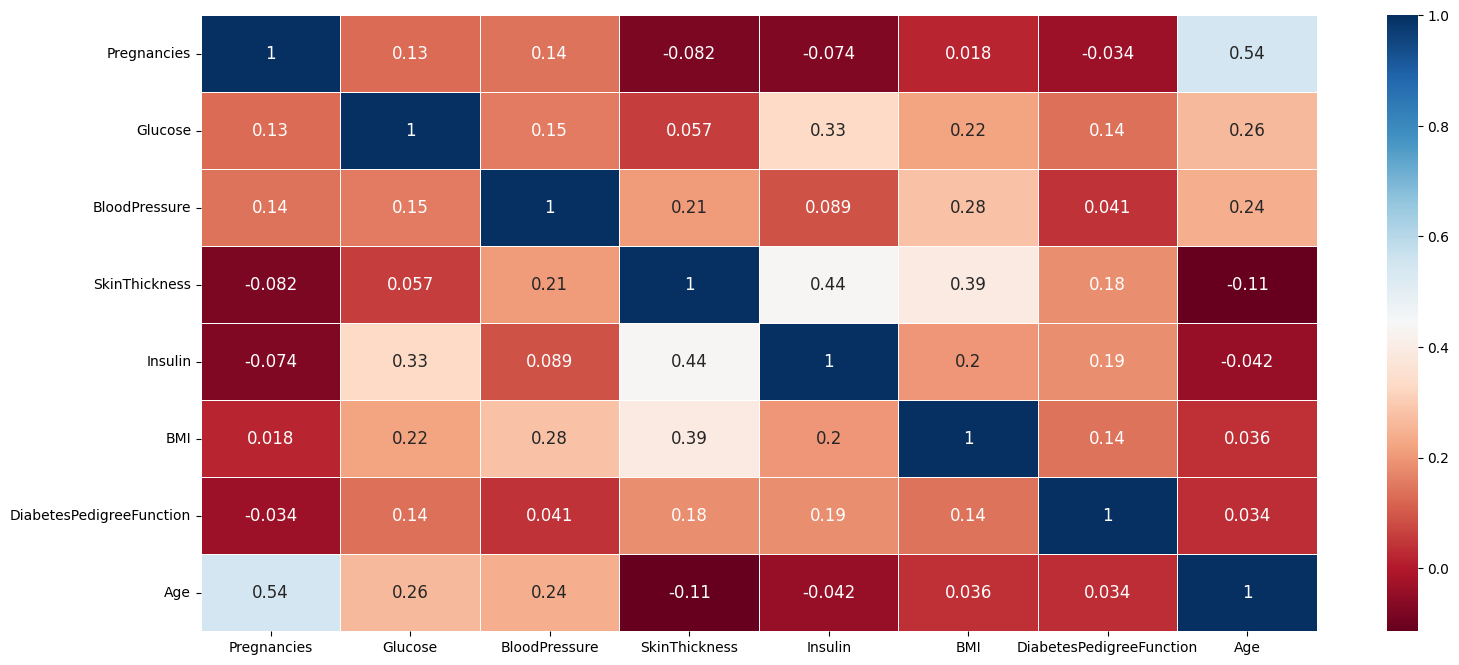

In [15]:
correlation_matrix(df,num_cols)

In [16]:
for col in num_cols:
    target_summary_with_num(df,"Outcome",col)

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64


Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64


Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64


Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64


Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64


Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64


Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64


Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64




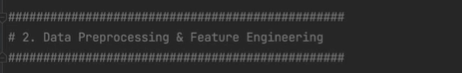

In [17]:
def outlier_thresholds(dataframe,col_name,q1 = 0.25 , q3 = 0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 +1.5 * interquantile_range
    low_limit = quartile1 -1.5 *interquantile_range
    return low_limit , up_limit
    
def check_outlier(dataframe, col_name,q1 = 0.25 , q3 = 0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name,q1,q3)  # Değişken adı düzeltildi
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):  # Parantezler ve operatör düzeltildi
        return True
    else:
        return False
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [18]:
def one_hot_encoder(dataframe, categorical_cols , drop_first=True):
    dataframe = pd.get_dummies(dataframe , columns=categorical_cols , drop_first=drop_first)
    return dataframe

In [19]:
df.columns = [col.upper() for col in df.columns]

In [20]:
df['NEW_GLUCOSE_CAT'] = pd.cut(x=df['GLUCOSE'],bins=[-1,139,200],labels=["normal","prediabetes"]) 

In [21]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_GLUCOSE_CAT
0,6,148,72,35,0,33.6,0.627,50,1,prediabetes
1,1,85,66,29,0,26.6,0.351,31,0,normal
2,8,183,64,0,0,23.3,0.672,32,1,prediabetes
3,1,89,66,23,94,28.1,0.167,21,0,normal
4,0,137,40,35,168,43.1,2.288,33,1,normal


In [22]:
# Age kategorize etme
df.loc[(df['AGE'] < 35), "NEW_AGE_CAT"] = 'young'
df.loc[(df['AGE'] >= 35) & (df['AGE'] <= 55), "NEW_AGE_CAT"] = 'middleage'
df.loc[(df['AGE'] > 55), "NEW_AGE_CAT"] = 'old'


In [23]:
# BMI sınıflandırması
df['NEW_BMI_RANGE'] = pd.cut(x=df['BMI'], 
                             bins=[-1, 18.5, 24.9, 29.9, 100], 
                             labels=["underweight", "healty", "overweight", "obese"])


In [24]:
# BMI sınıflandırması
df['NEW_BLODDPRESSURE'] = pd.cut(x=df['BLOODPRESSURE'], 
                             bins=[-1, 79, 89, 123], 
                             labels=["normal", "hs1", "hs2"])


In [25]:
check_df(df)

##################### Shape #####################
(768, 13)
##################### Types #####################
PREGNANCIES                    int64
GLUCOSE                        int64
BLOODPRESSURE                  int64
SKINTHICKNESS                  int64
INSULIN                        int64
BMI                          float64
DIABETESPEDIGREEFUNCTION     float64
AGE                            int64
OUTCOME                        int64
NEW_GLUCOSE_CAT             category
NEW_AGE_CAT                   object
NEW_BMI_RANGE               category
NEW_BLODDPRESSURE           category
dtype: object
##################### Head ######################
   PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23    

In [26]:
cat_cols , num_cols , cat_but_car = grab_col_names(df,cat_th = 5, car_th=20)

Observations: 768
Variables: 13
cat_cols: 5
num_cols: 8
cat_but_car: 0
num_but_cat: 4


In [27]:
for col in cat_cols: 
    cat_summary(df,col)

             NEW_AGE_CAT      Ratio
NEW_AGE_CAT                        
young                488  63.541667
middleage            230  29.947917
old                   50   6.510417
##########################################
         OUTCOME      Ratio
OUTCOME                    
0            500  65.104167
1            268  34.895833
##########################################
                 NEW_GLUCOSE_CAT      Ratio
NEW_GLUCOSE_CAT                            
normal                       571  74.348958
prediabetes                  197  25.651042
##########################################
               NEW_BMI_RANGE      Ratio
NEW_BMI_RANGE                          
obese                    472  61.458333
overweight               179  23.307292
healty                   102  13.281250
underweight               15   1.953125
##########################################
                   NEW_BLODDPRESSURE      Ratio
NEW_BLODDPRESSURE                              
normal                  

In [28]:
for col in cat_cols: 
    target_summary_with_cat(df,"OUTCOME",col)

             TARGET MEAN
NEW_AGE_CAT             
middleage       0.543478
old             0.340000
young           0.258197


         TARGET MEAN
OUTCOME             
0                0.0
1                1.0


                 TARGET MEAN
NEW_GLUCOSE_CAT             
normal              0.232925
prediabetes         0.685279


               TARGET MEAN
NEW_BMI_RANGE             
underweight       0.133333
healty            0.068627
overweight        0.223464
obese             0.463983


                   TARGET MEAN
NEW_BLODDPRESSURE             
normal                0.316163
hs1                   0.420690
hs2                   0.483333




C:\Users\hasan\AppData\Local\Temp\ipykernel_9240\936366930.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pd.DataFrame({"TARGET MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
C:\Users\hasan\AppData\Local\Temp\ipykernel_9240\936366930.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pd.DataFrame({"TARGET MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
C:\Users\hasan\AppData\Local\Temp\ipykernel_9240\936366930.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass

In [29]:
cat_cols = [col for col in cat_cols if "OUTCOME" not in col]
cat_cols

['NEW_AGE_CAT', 'NEW_GLUCOSE_CAT', 'NEW_BMI_RANGE', 'NEW_BLODDPRESSURE']

In [30]:
df = one_hot_encoder(df,cat_cols,drop_first=True)
check_df(df)

##################### Shape #####################
(768, 17)
##################### Types #####################
PREGNANCIES                      int64
GLUCOSE                          int64
BLOODPRESSURE                    int64
SKINTHICKNESS                    int64
INSULIN                          int64
BMI                            float64
DIABETESPEDIGREEFUNCTION       float64
AGE                              int64
OUTCOME                          int64
NEW_AGE_CAT_old                   bool
NEW_AGE_CAT_young                 bool
NEW_GLUCOSE_CAT_prediabetes       bool
NEW_BMI_RANGE_healty              bool
NEW_BMI_RANGE_overweight          bool
NEW_BMI_RANGE_obese               bool
NEW_BLODDPRESSURE_hs1             bool
NEW_BLODDPRESSURE_hs2             bool
dtype: object
##################### Head ######################
   PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN   BMI  \
0            6      148             72             35        0  33.6   
1            1     

In [31]:
cat_cols , num_cols , cat_but_car = grab_col_names(df,cat_th = 5, car_th=20)

Observations: 768
Variables: 17
cat_cols: 9
num_cols: 8
cat_but_car: 0
num_but_cat: 9


In [32]:
cat_cols = [col for col in cat_cols if "OUTCOME" not in col]
cat_cols

['NEW_AGE_CAT_old',
 'NEW_AGE_CAT_young',
 'NEW_GLUCOSE_CAT_prediabetes',
 'NEW_BMI_RANGE_healty',
 'NEW_BMI_RANGE_overweight',
 'NEW_BMI_RANGE_obese',
 'NEW_BLODDPRESSURE_hs1',
 'NEW_BLODDPRESSURE_hs2']

In [33]:
for col in num_cols:
    print(col,check_outlier(df,col,0.05,0.95))

PREGNANCIES False
GLUCOSE False
BLOODPRESSURE False
SKINTHICKNESS False
INSULIN True
BMI False
DIABETESPEDIGREEFUNCTION False
AGE False


In [34]:
replace_with_thresholds(df,"INSULIN")

C:\Users\hasan\AppData\Local\Temp\ipykernel_9240\664793377.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-190.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [35]:
for col in num_cols:
    print(col,check_outlier(df,col,0.05,0.95))

PREGNANCIES False
GLUCOSE False
BLOODPRESSURE False
SKINTHICKNESS False
INSULIN False
BMI False
DIABETESPEDIGREEFUNCTION False
AGE False


In [36]:
X_scalde = StandardScaler().fit_transform(df[num_cols])
df[num_cols]=pd.DataFrame(X_scalde,columns=df[num_cols].columns)

In [37]:
y=df['OUTCOME']
X=df.drop(["OUTCOME"], axis=1)

In [38]:
check_df(df)

##################### Shape #####################
(768, 17)
##################### Types #####################
PREGNANCIES                    float64
GLUCOSE                        float64
BLOODPRESSURE                  float64
SKINTHICKNESS                  float64
INSULIN                        float64
BMI                            float64
DIABETESPEDIGREEFUNCTION       float64
AGE                            float64
OUTCOME                          int64
NEW_AGE_CAT_old                   bool
NEW_AGE_CAT_young                 bool
NEW_GLUCOSE_CAT_prediabetes       bool
NEW_BMI_RANGE_healty              bool
NEW_BMI_RANGE_overweight          bool
NEW_BMI_RANGE_obese               bool
NEW_BLODDPRESSURE_hs1             bool
NEW_BLODDPRESSURE_hs2             bool
dtype: object
##################### Head ######################
   PREGNANCIES   GLUCOSE  BLOODPRESSURE  SKINTHICKNESS   INSULIN       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.787602  0.204013   
1    -0

In [39]:
def diabetes_data_prep(dataframe):
    dataframe.columns = [col.upper() for col in dataframe.columns]

    dataframe['NEW_GLUCOSE_CAT'] = pd.cut(x=dataframe['GLUCOSE'], bins=[-1, 139, 200], labels=["normal", "prediabetes"])
    
    # Age kategorize etme
    dataframe.loc[(dataframe['AGE'] < 35), "NEW_AGE_CAT"] = 'young'
    dataframe.loc[(dataframe['AGE'] >= 35) & (dataframe['AGE'] <= 55), "NEW_AGE_CAT"] = 'middleage'
    dataframe.loc[(dataframe['AGE'] > 55), "NEW_AGE_CAT"] = 'old'

    # BMI sınıflandırması
    dataframe['NEW_BMI_RANGE'] = pd.cut(x=dataframe['BMI'], 
                                       bins=[-1, 18.5, 24.9, 29.9, 100], 
                                       labels=["underweight", "healty", "overweight", "obese"])
    
    # Blood Pressure sınıflandırması
    dataframe['NEW_BLOODPRESSURE'] = pd.cut(x=dataframe['BLOODPRESSURE'], 
                                            bins=[-1, 79, 89, 123], 
                                            labels=["normal", "hs1", "hs2"])

    dataframe.columns = [col.upper() for col in dataframe.columns]
    
    # Grab column names
    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe, cat_th=5, car_th=20)

    # Summary for categorical columns
    for col in cat_cols: 
        cat_summary(dataframe, col)

    # Target summary with categorical variables
    for col in cat_cols: 
        target_summary_with_cat(dataframe, "OUTCOME", col)

    cat_cols = [col for col in cat_cols if "OUTCOME" not in col]
    
    dataframe = one_hot_encoder(dataframe, cat_cols, drop_first=True)
    check_df(dataframe)

    replace_with_thresholds(dataframe, "INSULIN")

    for col in num_cols:
        print(col, check_outlier(dataframe, col, 0.05, 0.95))

    # Scaling numerical columns
    X_scaled = StandardScaler().fit_transform(dataframe[num_cols])
    dataframe[num_cols] = pd.DataFrame(X_scaled, columns=dataframe[num_cols].columns)

    # X ve y dönüşleri
    X = dataframe.drop("OUTCOME", axis=1)
    y = dataframe["OUTCOME"]
    return X, y




In [40]:
df = pd.read_csv("../datasets/diabetes.csv")
check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head ######################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.62

In [41]:

df = pd.read_csv("../datasets/diabetes.csv")
check_df(df)

X, y = diabetes_data_prep(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head ######################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.62

C:\Users\hasan\AppData\Local\Temp\ipykernel_9240\936366930.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pd.DataFrame({"TARGET MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
C:\Users\hasan\AppData\Local\Temp\ipykernel_9240\936366930.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pd.DataFrame({"TARGET MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
C:\Users\hasan\AppData\Local\Temp\ipykernel_9240\936366930.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass

##################### Shape #####################
(768, 17)
##################### Types #####################
PREGNANCIES                      int64
GLUCOSE                          int64
BLOODPRESSURE                    int64
SKINTHICKNESS                    int64
INSULIN                          int64
BMI                            float64
DIABETESPEDIGREEFUNCTION       float64
AGE                              int64
OUTCOME                          int64
NEW_AGE_CAT_old                   bool
NEW_AGE_CAT_young                 bool
NEW_GLUCOSE_CAT_prediabetes       bool
NEW_BMI_RANGE_healty              bool
NEW_BMI_RANGE_overweight          bool
NEW_BMI_RANGE_obese               bool
NEW_BLOODPRESSURE_hs1             bool
NEW_BLOODPRESSURE_hs2             bool
dtype: object
##################### Head ######################
   PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN   BMI  \
0            6      148             72             35        0  33.6   
1            1     

C:\Users\hasan\AppData\Local\Temp\ipykernel_9240\664793377.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-190.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


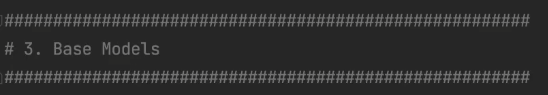

In [51]:
def base_models(X, y, scoring="roc_auc"):
  """
  Farklı sınıflandırma algoritmalarının performansını karşılaştırır.

  Args:
    X: Bağımsız değişkenler
    y: Hedef değişken
    scoring: Skorlama metrik (varsayılan: roc_auc)
  """

  print("Base Models....")

  classifiers = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('SVC', SVC()),
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('LightGBM', LGBMClassifier()),
    # ('CatBoost', CatBoostClassifier(verbose=False))
  ]

  for name, classifier in classifiers:
    cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
    print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name})")

In [52]:
base_models(X,y)

Base Models....
roc_auc: 0.841 (LR)
roc_auc: 0.791 (KNN)
roc_auc: 0.8355 (SVC)
roc_auc: 0.6625 (CART)
roc_auc: 0.8255 (RF)


C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


roc_auc: 0.8196 (AdaBoost)
roc_auc: 0.824 (GBM)


C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:00:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:00:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:00:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

roc_auc: 0.8008 (XGBoost)
[LightGBM] [Info] Number of positive: 178, number of negative: 334
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 512, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.347656 -> initscore=-0.629357
[LightGBM] [Info] Start training from score -0.629357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

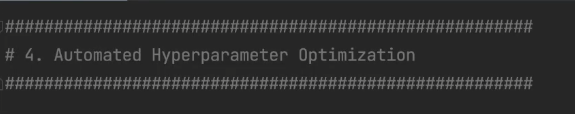

In [58]:
def hyperparameter_optimization(X, y, cv=3, scoring="roc_auc"):
  """
  Farklı sınıflandırma algoritmaları için hiperparametre optimizasyonu yapar.

  Args:
    X: Bağımsız değişkenler
    y: Hedef değişken
    cv: Çapraz doğrulama kat sayısı
    scoring: Skorlama metrik (varsayılan: roc_auc)
  """

  print("Hyperparameter Optimization...")

  best_models = {}

  for name, classifier, params in classifiers:
    print(f"########## {name} ##########")

    cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
    print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

    gs = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
    final_model = classifier.set_params(**gs.best_params_)

    cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
    print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
    print(f"{name} best params: {gs.best_params_}", end="\n\n")

    best_models[name] = final_model

  return best_models

In [62]:
knn_params = {'n_neighbors': range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {'max_depth': [8, 15, None],
            "max_features": [5, 7, "auto"],
            "min_samples_split": [15, 20],
            "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                 "max_depth": [5, 8],
                 "n_estimators": [100, 200],
                 "colsample_bytree": [0.5, 1]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                  "n_estimators": [300, 500],
                  "colsample_bytree": [0.7, 1]}

In [63]:
classifiers = [
    ('KNN', KNeighborsClassifier(), knn_params),
    ('CART', DecisionTreeClassifier(), cart_params),
    ('RF', RandomForestClassifier(), rf_params),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
    ('LightGBM', LGBMClassifier(), Lightgbm_params)
]

In [65]:

best_models = hyperparameter_optimization(X,y)

Hyperparameter Optimization...
########## KNN ##########
roc_auc (Before): 0.8211
roc_auc (After): 0.8211
KNN best params: {'n_neighbors': 20}

########## CART ##########
roc_auc (Before): 0.7943


C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


roc_auc (After): 0.7943
CART best params: {'max_depth': 6, 'min_samples_split': 23}

########## RF ##########
roc_auc (Before): 0.8347


C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    valida

roc_auc (After): 0.8369
RF best params: {'max_depth': None, 'max_features': 5, 'min_samples_split': 20, 'n_estimators': 200}

########## XGBoost ##########


C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:12:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:12:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:12:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

roc_auc (Before): 0.8201


C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:12:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:12:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:12:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

roc_auc (After): 0.8201
XGBoost best params: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

########## LightGBM ##########
[LightGBM] [Info] Number of positive: 178, number of negative: 334
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 512, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.347656 -> initscore=-0.629357
[LightGBM] [Info] Start training from score -0.629357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

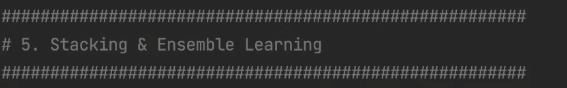

In [66]:
def voting_classifier(best_models, X, y):
  """
  Birden fazla sınıflandırma modelini birleştiren bir oylama sınıflandırıcısı oluşturur.

  Args:
    best_models: Daha önce eğitilmiş en iyi modellerin bulunduğu sözlük
    X: Bağımsız değişkenler
    y: Hedef değişken
  """

  print("Voting Classifier...")

  voting_clf = VotingClassifier(estimators=[('KNN', best_models['KNN']), ('RF', best_models['RF']),
                                             ('LightGBM', best_models['LightGBM'])],
                                voting='soft').fit(X, y)

  cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])

  print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
  print(f"F1Score: {cv_results['test_f1'].mean()}")
  print(f"ROC_AUC: {cv_results['test_roc_auc'].mean()}")

  return voting_clf

In [74]:
voting_clf=voting_classifier(best_models,X,y)

Voting Classifier...
[LightGBM] [Info] Number of positive: 268, number of negative: 500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

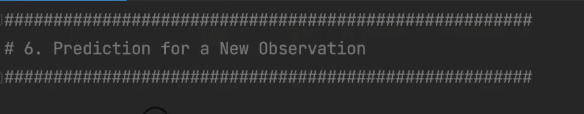

In [75]:
X.columns

Index(['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN',
       'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'NEW_AGE_CAT_old',
       'NEW_AGE_CAT_young', 'NEW_GLUCOSE_CAT_prediabetes',
       'NEW_BMI_RANGE_healty', 'NEW_BMI_RANGE_overweight',
       'NEW_BMI_RANGE_obese', 'NEW_BLOODPRESSURE_hs1',
       'NEW_BLOODPRESSURE_hs2'],
      dtype='object')

In [76]:
random_user = X.sample(1,random_state=45)

voting_clf.predict(random_user)

array([1], dtype=int64)

In [77]:
joblib.dump(voting_clf,"voting_clf2.pkl")

['voting_clf2.pkl']

In [79]:
new_model=joblib.load("voting_clf2.pkl")

In [80]:
new_model.predict(random_user)

array([1], dtype=int64)

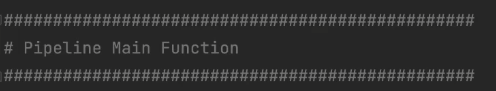

In [81]:
def main():
    df = pd.read_csv("../datasets/diabetes.csv")
    X,y=diabetes_data_prep(df)
    base_models(X,y)
    best_models = hyperparameter_optimization(X,y)
    voting_clf=voting_classifier(best_models,X,y)
    joblib.dump(voting_clf,"voting_clf.pkl")
    return voting_clf

In [82]:
if __name__ == "__main__":
    main()

Observations: 768
Variables: 13
cat_cols: 5
num_cols: 8
cat_but_car: 0
num_but_cat: 4
             NEW_AGE_CAT      Ratio
NEW_AGE_CAT                        
young                488  63.541667
middleage            230  29.947917
old                   50   6.510417
##########################################
         OUTCOME      Ratio
OUTCOME                    
0            500  65.104167
1            268  34.895833
##########################################
                 NEW_GLUCOSE_CAT      Ratio
NEW_GLUCOSE_CAT                            
normal                       571  74.348958
prediabetes                  197  25.651042
##########################################
               NEW_BMI_RANGE      Ratio
NEW_BMI_RANGE                          
obese                    472  61.458333
overweight               179  23.307292
healty                   102  13.281250
underweight               15   1.953125
##########################################
                   NEW_BLOODPRESSU

C:\Users\hasan\AppData\Local\Temp\ipykernel_9240\936366930.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pd.DataFrame({"TARGET MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
C:\Users\hasan\AppData\Local\Temp\ipykernel_9240\936366930.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pd.DataFrame({"TARGET MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
C:\Users\hasan\AppData\Local\Temp\ipykernel_9240\936366930.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass

roc_auc: 0.8285 (RF)


C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


roc_auc: 0.8196 (AdaBoost)
roc_auc: 0.8235 (GBM)


C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

roc_auc: 0.8008 (XGBoost)
[LightGBM] [Info] Number of positive: 178, number of negative: 334
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 512, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.347656 -> initscore=-0.629357
[LightGBM] [Info] Start training from score -0.629357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


roc_auc (After): 0.7943
CART best params: {'max_depth': 6, 'min_samples_split': 23}

########## RF ##########
roc_auc (Before): 0.8361


C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\hasan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    valida

roc_auc (After): 0.8355
RF best params: {'max_depth': 8, 'max_features': 7, 'min_samples_split': 15, 'n_estimators': 200}

########## XGBoost ##########
roc_auc (Before): 0.8201


C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hasan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

roc_auc (After): 0.8201
XGBoost best params: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

########## LightGBM ##########
[LightGBM] [Info] Number of positive: 178, number of negative: 334
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 512, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.347656 -> initscore=-0.629357
[LightGBM] [Info] Start training from score -0.629357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv